# Manipulation de séries financières avec la classe StockPrices

La classe [StockPrices](http://www.xavierdupre.fr/app/pyensae/helpsphinx/notebooks/pyensae%20StockPrices.html?highlight=stockprices) facilite la récupération de données financières via différents sites. Le site [Yahoo Finance](http://finance.yahoo.com/) requiet maintenant un cookie (depuis Mai 2017) et il est préférable de choisir [Google](https://www.google.com/finance?q=apple&ei=bPghWZnLDoKVULfBk-gC) ou [Quandl](https://www.quandl.com/tools/python). Google ne fonctionne que les marchés américains, [Quandl](https://www.quandl.com/tools/python) a des historiques plus courts.

In [1]:
import pyensae
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [3]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


### Initialisation

In [4]:
import pyensae
import os
from pyensae.finance import StockPrices
cache = os.path.abspath("cache")
if not os.path.exists(cache) : os.mkdir(cache)

### Créer un objet StockPrices

Le plus est d'utiliser le tick de la série financière utilisé par le site <a href="https://fr.finance.yahoo.com/">Yahoo Finance</a>.

In [5]:
stock = StockPrices("NASDAQ:MSFT", folder=cache)
stock.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2001-10-24,2001-10-24,30.25,30.81,29.81,30.66,76795400
2001-10-25,2001-10-25,30.31,31.30,29.78,31.28,73505200
2001-10-26,2001-10-26,31.16,31.82,31.04,31.10,61501800
2001-10-29,2001-10-29,31.05,31.10,29.77,29.82,55118000
2001-10-30,2001-10-30,29.46,29.77,29.10,29.44,55306200


In [7]:
stock.tail()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2017-09-08,2017-09-08,74.33,74.44,73.84,73.98,14703816
2017-09-11,2017-09-11,74.31,74.94,74.31,74.76,17910383
2017-09-12,2017-09-12,74.76,75.24,74.37,74.68,14394850
2017-09-13,2017-09-13,74.93,75.23,74.55,75.21,13380802
2017-09-14,2017-09-14,75.00,75.49,74.52,74.77,15733914


La classe <tt>StockPrices</tt> contient un objet <a href="http://pandas.pydata.org/pandas-docs/version/0.13.1/generated/pandas.DataFrame.html">pandas.DataFrame</a> auquel on accède en écrivant <tt>stock.dataframe</tt> ou <tt>stock.df</tt> :

In [9]:
stock.dataframe.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

De la même manière, on peut créer un objet <tt>StockPrices</tt> à partir d'un DataFrame :

In [11]:
import pandas
data = [{"Date":"2014-04-01", "Close":105.6}, {"Date":"2014-04-02", "Close":104.6}, 
        {"Date":"2014-04-03", "Close":105.8}, ]
df = pandas.DataFrame(data)
stock = StockPrices("donnees",df)
stock.head()

,Close,Date
Date,,
2014-04-01,105.6,2014-04-01
2014-04-02,104.6,2014-04-02
2014-04-03,105.8,2014-04-03


### Quelques graphes

Premier dessin, on télécharge les données de BNP puis on dessine le cours de l'action.

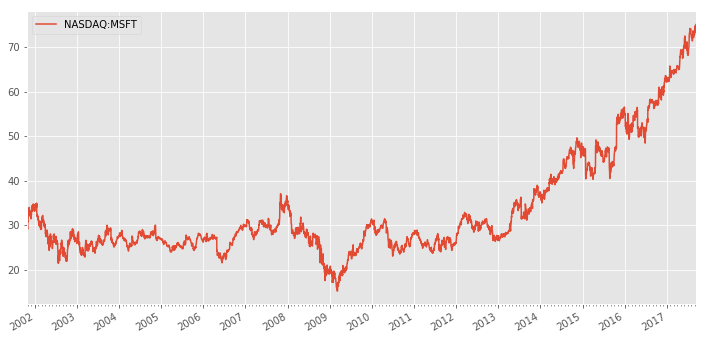

In [13]:
import datetime
stock = StockPrices("NASDAQ:MSFT", folder=cache)
ax = StockPrices.draw(stock, figsize=(12,6))

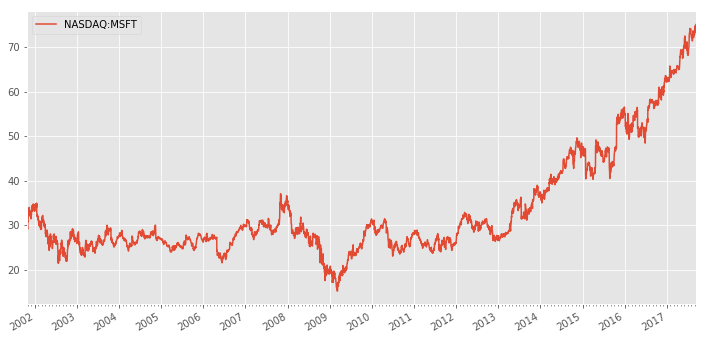

In [14]:
stock = StockPrices("NASDAQ:MSFT", folder=cache)
StockPrices.draw(stock, figsize=(12,6))

La même chose se produit sur une autre série financière mais pas à la même date. On trace maintenant la série *Open* (*Adj Close* défini
sur cette page [View and download historical price, dividend, or split data](https://help.yahoo.com/kb/finance/historical-prices-sln2311.html?impressions=true) n'est disponible qu'avec Yahoo).

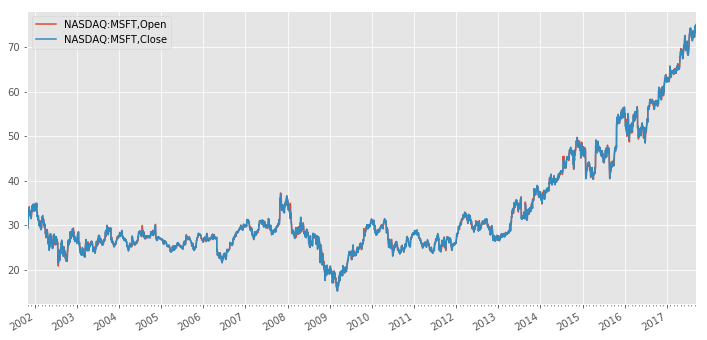

In [16]:
stock = StockPrices("NASDAQ:MSFT", folder = cache)
StockPrices.draw(stock, field=["Open", "Close"], figsize=(12,6))

Ce type de série ne fait pas toujours apparaître les saut de prix qui survient comme par exemple le <a href="http://invest.bnpparibas.com/fr/pid5900/en-bref.html">20 février 2002</a> lorsque le cours nominal de l'action de la BNP a été divisé par deux pour augmenter la liquidité. Le nombre d'actions a été multiplié par deux. Les données sont le plus souvent corrigées [BNP février 2002](http://www.google.com/finance/historical?cid=667923&startdate=Feb+15%2C+2002&enddate=Feb+28%2C+2002&num=30&ei=AP8hWaDXF4WNUNuujYgK).

### Ajouter une seconde série sur un graphe

Dans l'exemple suivant, on trace une série financière puis on ajoute la série des rendements sur un second axe.

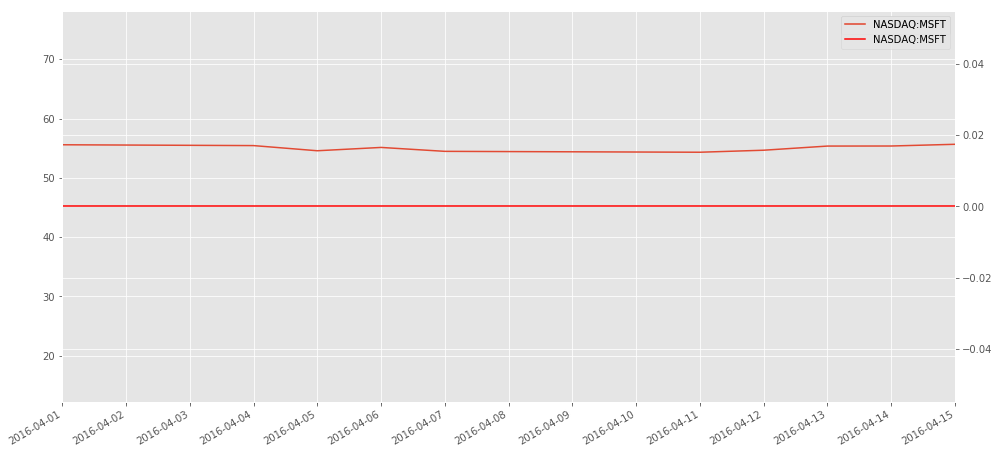

In [18]:
stock = StockPrices("NASDAQ:MSFT")
ret   = stock.returns()["2016-04-01":"2016-04-15"]
ret.dataframe.loc["2016-04-01":"2016-04-30","Close"]=0  # on annule certains valeurs
ax = stock.plot(figsize=(16,8))
ret.plot(axis=2, ax=ax)

### Quelques opérations

In [20]:
os.listdir(cache)

['NASDAQ_MSFT.2000-01-03.2017-09-15.txt']

On affiche les dernières lignes.

In [22]:
stock.tail()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2017-09-08,2017-09-08,74.33,74.44,73.84,73.98,14703816
2017-09-11,2017-09-11,74.31,74.94,74.31,74.76,17910383
2017-09-12,2017-09-12,74.76,75.24,74.37,74.68,14394850
2017-09-13,2017-09-13,74.93,75.23,74.55,75.21,13380802
2017-09-14,2017-09-14,75.00,75.49,74.52,74.77,15733914


On récupère la série des rendements.

In [24]:
ret = stock.returns()
ret.tail()

,Date,Volume,Open,High,Low,Close
Date,,,,,,
2017-09-08,2017-09-08,14703816,0.008822,-0.002145,0.003261,-0.004843
2017-09-11,2017-09-11,17910383,-0.000269,0.006717,0.006365,0.010543
2017-09-12,2017-09-12,14394850,0.006056,0.004003,0.000807,-0.001070
2017-09-13,2017-09-13,13380802,0.002274,-0.000133,0.002420,0.007097
2017-09-14,2017-09-14,15733914,0.000934,0.003456,-0.000402,-0.005850


On trace la série des rendements pour les derniers mois.

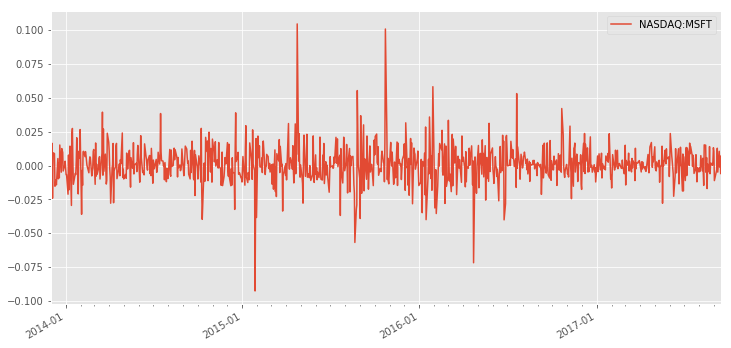

In [26]:
StockPrices.draw(ret, figsize=(12,6), begin="2013-12-01", date_format="%Y-%m")

### Quelques notions sur les dates

La classe <i>StockPrices</i> utilise les dates sous forme de chaînes de caractères. De cette façon, il n'est pas possible de faire des opérations dessus. Pour ce faire, il faut les convertir en un objet appelé <a href="https://docs.python.org/2/library/datetime.html">datetime</a>.

In [28]:
from datetime import datetime, timedelta
dt = datetime.strptime("2014-03-31","%Y-%m-%d")
dt

datetime.datetime(2014, 3, 31, 0, 0)

On ajoute un jour :

In [30]:
delta = timedelta(1)
dt = dt + delta
dt

datetime.datetime(2014, 4, 1, 0, 0)

Puis on convertit dans l'autre sens :

In [32]:
s = dt.strftime("%Y-%m-%d")
s

'2014-04-01'

### Promenade dans l'index

Il est facile de récupérer les valeurs correspondant à une date précise. Mais comment récupérer la valeur du jour d'après ?

In [34]:
stock = StockPrices ("NASDAQ:GOOGL", folder = cache)
df = stock.dataframe
print("A", df["2005-01-04":"2005-01-06"])
print("D", df.loc["2005-01-04","Close"])
print("G", df.index.get_loc("2005-01-06"))  # retourne la position de cette date

A                   Date    Open    High    Low  Close    Volume
Date                                                          
2005-01-04  2005-01-04  100.77  101.57  96.84  97.35  13762396
2005-01-05  2005-01-05   96.82   98.55  96.21  96.85   8239545
2005-01-06  2005-01-06   97.72   98.05  93.95  94.37  10389803
D 97.35
G 97


### Sauver les tables

On peut conserver les données sous forme de fichiers pour les récupérer plus tard.

In [35]:
stock = StockPrices("NASDAQ:GOOGL", folder=cache)
stock.dataframe.to_csv("donnees.txt", sep="\t")
os.listdir(".")

['.ipynb_checkpoints',
 'azure_blob_storage.ipynb',
 'cache',
 'dbcc.png',
 'donnees.txt',
 'draw_diagram.ipynb',
 'example_corrplot.ipynb',
 'example_of_ssh_client_communication.ipynb',
 'exemple.py',
 'flatfile.txt',
 'flatfile_tab.txt',
 'flatfile_tab2.txt',
 'flatfile_tab_pos2.db3',
 'flatfile_tab_pos2.txt',
 'folium_map.ipynb',
 'img_nb_sqlitespy.png',
 'magic_commands_about_files.ipynb',
 'notebook_example.db3',
 'pyensae_flat2db3.ipynb',
 'pyensae_sql_magic.ipynb',
 'pyensae_StockPrices.ipynb',
 'pyensae_text2table.ipynb',
 'pyensae_velib.ipynb',
 'python_hadoop_pig.ipynb',
 'r2python.ipynb',
 'README.txt',
 'using_qgrid_with_jsdf.ipynb',
 'velib_vanves.txt',
 'velib_vanves.zip',
 'view_differences.ipynb']

Le fichier est sauvé. Pour le récupérer avec pandas :

In [37]:
import pandas
df = pandas.read_csv("donnees.txt", sep="\t")
df.head()

,Date,Date.1,Open,High,Low,Close,Volume
0,2004-08-19,2004-08-19,50.06,52.08,48.03,50.22,22353092
1,2004-08-20,2004-08-20,50.79,54.59,50.30,54.21,11429498
2,2004-08-23,2004-08-23,55.44,56.80,54.58,54.75,9140244
3,2004-08-24,2004-08-24,55.68,55.86,51.84,52.49,7632224
4,2004-08-25,2004-08-25,52.53,54.05,51.99,53.05,4599110


Les dates apparaissent deux fois.

In [39]:
with open("donnees.txt","r") as f: 
    text = f.read()
print(text[:400])

Date	Date	Open	High	Low	Close	Volume
2004-08-19	2004-08-19	50.06	52.08	48.03	50.22	22353092
2004-08-20	2004-08-20	50.79	54.59	50.3	54.21	11429498
2004-08-23	2004-08-23	55.44	56.8	54.58	54.75	9140244
2004-08-24	2004-08-24	55.68	55.86	51.84	52.49	7632224
2004-08-25	2004-08-25	52.53	54.05	51.99	53.05	4599110
2004-08-26	2004-08-26	52.53	54.03	52.38	54.01	3551168
2004-08-27	2004-08-27	54.1	54.36	52.9	5


Cela est dû au fait que les dates sont à la fois une colonne et servent d'index. Pour éviter de les conserver deux fois, on demande explicitement à ce que l'index ne soit pas ajouté au fichier : 

In [40]:
stock = StockPrices("NASDAQ:GOOGL", folder=cache)
stock.dataframe.to_csv("donnees.txt", sep="\t", index=False)

Puis on récupère les données :

In [41]:
df = pandas.read_csv("donnees.txt",sep="\t")
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,50.06,52.08,48.03,50.22,22353092
1,2004-08-20,50.79,54.59,50.30,54.21,11429498
2,2004-08-23,55.44,56.80,54.58,54.75,9140244
3,2004-08-24,55.68,55.86,51.84,52.49,7632224
4,2004-08-25,52.53,54.05,51.99,53.05,4599110


On vérifie le fichier sur disque dur :

In [43]:
with open("donnees.txt", "r") as f:
    text = f.read()
print(text[:400])

Date	Open	High	Low	Close	Volume
2004-08-19	50.06	52.08	48.03	50.22	22353092
2004-08-20	50.79	54.59	50.3	54.21	11429498
2004-08-23	55.44	56.8	54.58	54.75	9140244
2004-08-24	55.68	55.86	51.84	52.49	7632224
2004-08-25	52.53	54.05	51.99	53.05	4599110
2004-08-26	52.53	54.03	52.38	54.01	3551168
2004-08-27	54.1	54.36	52.9	53.13	3108977
2004-08-30	52.8	52.8	51.06	51.06	2601620
2004-08-31	51.21	51.91	51.13


C'est mieux.